In [1]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import matplotlib.pyplot as plt
import seaborn as sns


### Loading the csv file

In [2]:
df = pd.read_csv('data/nerd.csv')

#### Mapping the coordinates 

In [3]:
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

for index, row in df.iterrows():
    popup_text = f"<b>{row['SiteName']}</b><br>Date: {row['CRA']}<br>Location: ({row['Latitude']}, {row['Longitude']})"
    folium.Marker([row['Latitude'], row['Longitude']], popup=popup_text, 
                  icon=folium.Icon(color='blue', icon='info-sign')).add_to(m)

# Save the map as an HTML file
m.save('map.html')

#### Heatmap for the coordinates

In [4]:
heat_df = df[['Latitude', 'Longitude']].dropna()  # Drop rows with missing coordinates

m_heat = folium.Map(location=map_center, zoom_start=6)

heat_data = [[row['Latitude'], row['Longitude']] for index, row in heat_df.iterrows()]

HeatMap(heat_data, radius=15, blur=20).add_to(m_heat)

# Save the heatmap as an HTML file
m_heat.save('heatmap.html')

#### Species Frequency

In [5]:
species_frequency = df['Species'].value_counts().head(10)
top_species_df = pd.DataFrame({'Species': species_frequency.index, 'Frequency': species_frequency.values})
top_species_df

,Species,Frequency
0,Olea europaea,356
1,Cerealia,310
2,Homo sapiens,280
3,Hordeum vulgare,249
4,animal,128
5,Triticum,125
6,Olea,103
7,Ovis/Capra,67
8,Tamarix,64
9,Quercus,63


#### Sites Frequency

In [6]:
sites_frequency = df['SiteName'].value_counts().head(10)
top_sites_df = pd.DataFrame({'Site': sites_frequency.index, 'Frequency': sites_frequency.values})
map_center = df[df['SiteName'] == sites_frequency.index[0]][['Latitude', 'Longitude']].iloc[0]

mymap = folium.Map(location=[map_center['Latitude'], map_center['Longitude']], zoom_start=10)

for site, count in sites_frequency.items():
    site_info = df[df['SiteName'] == site][['Latitude', 'Longitude']].iloc[0]
    folium.Marker(location=[site_info['Latitude'], site_info['Longitude']], popup=f"{site}: {count} occurrences").add_to(mymap)

# Display the map
mymap.save('topsites.html')
top_sites_df
# mymap

,Site,Frequency
0,Tell Sabi Abyad I,257
1,Çatalhöyük East,237
2,Arslantepe,211
3,Hisarlik (Troy),176
4,Tell Leilan,153
5,Tell Arbid,126
6,Megiddo (Tell al-Mutesellim),124
7,Jericho,119
8,Tel Rehov,111
9,Gegharot,105


### Frequency of CRA(Carbon Radioactive Age)

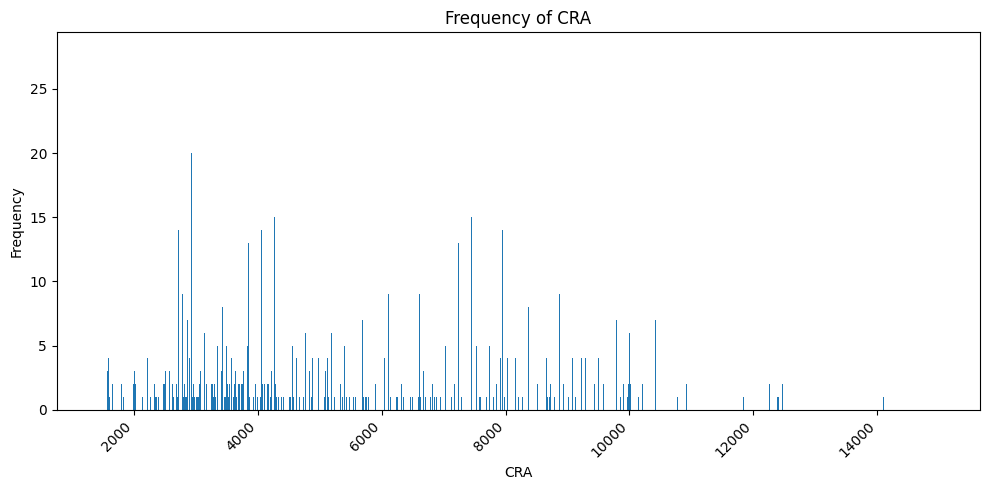

In [7]:
cra_frequency = df['CRA'].value_counts()
plt.figure(figsize=(10, 5))
plt.bar(cra_frequency.index, cra_frequency.values)
plt.title('Frequency of CRA')
plt.xlabel('CRA')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Numerical features

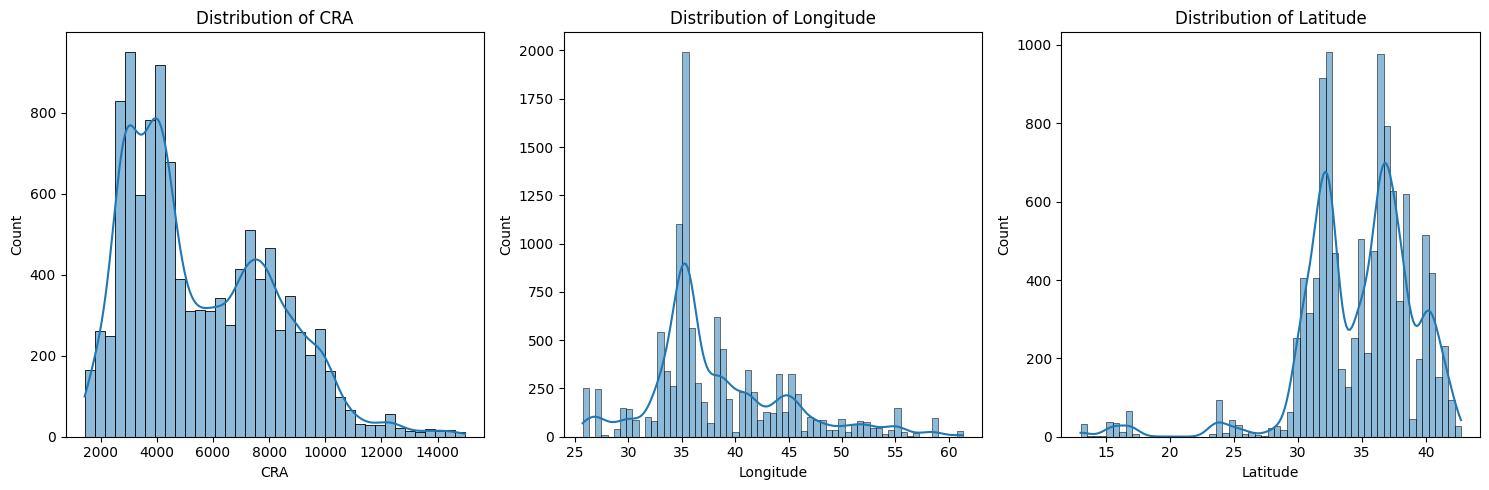

In [8]:
numerical_features = df[['CRA', 'Longitude', 'Latitude']]

num_plots = len(numerical_features.columns)
num_rows = (num_plots - 1) // 3 + 1
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_features.columns, 1):
    plt.subplot(num_rows, 3, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

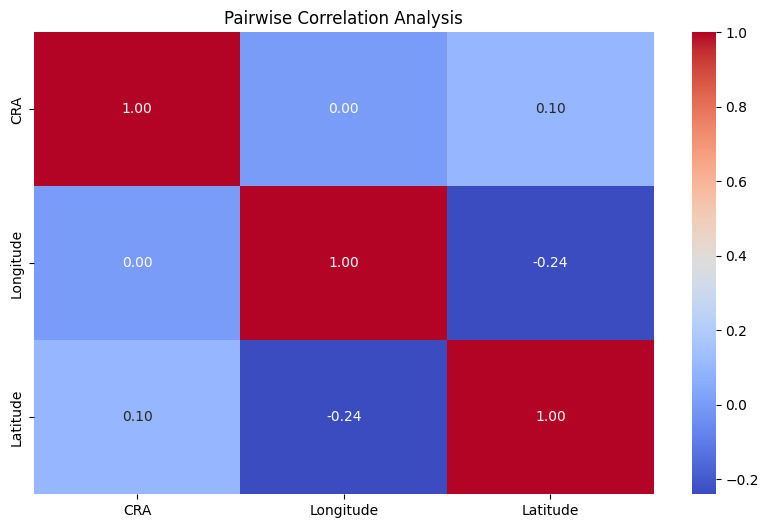

In [9]:
plt.figure(figsize=(10, 6))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pairwise Correlation Analysis')
plt.show()